In [1]:
from directed_graphs.datasets import visualize_heatmap, visualize_graph
import networkx as nx
from torch_geometric.utils import from_networkx
import torch
import torch_geometric

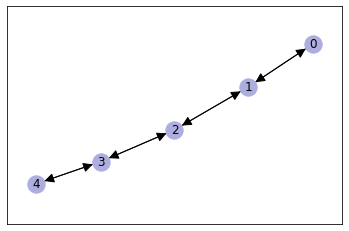

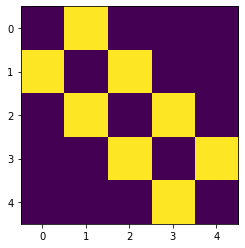

In [2]:
G = nx.path_graph(5)
data = from_networkx(G)

visualize_graph(data)

sparse_A = torch.sparse_coo_tensor(data.edge_index, torch.ones(data.edge_index.shape[1]))
A = sparse_A.to_dense()


visualize_heatmap(data.edge_index)

# PHATE

Calculating PHATE...
  Running PHATE on 2000 observations and 100 variables.
  Calculating graph and diffusion operator...
    Calculating KNN search...
    Calculated KNN search in 0.49 seconds.
    Calculating affinities...
    Calculated affinities in 0.33 seconds.
  Calculated graph and diffusion operator in 0.83 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.34 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 4.75 seconds.
Calculated PHATE in 5.94 seconds.


/tmp/ipykernel_260210/4020497857.py:6: DeprecationWarning: Call to deprecated function (or staticmethod) scatter2d. (Use scprep.plot.scatter2d instead) -- Deprecated since version 1.0.0.
  phate.plot.scatter2d(tree_phate, c=tree_clusters)


<AxesSubplot:>

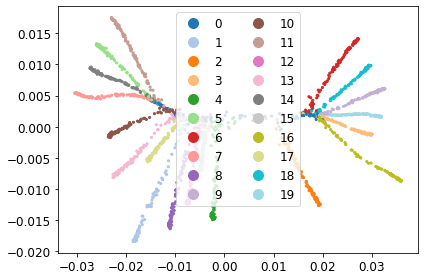

In [3]:
import phate
import matplotlib.pyplot as plt
tree_data, tree_clusters = phate.tree.gen_dla(n_dim=100, n_branch=20, branch_length=100)
phate_operator = phate.PHATE(knn=5, decay=20, t=150)
tree_phate = phate_operator.fit_transform(tree_data)
phate.plot.scatter2d(tree_phate, c=tree_clusters)

In [4]:
import numpy as np
import torch
from torch_geometric.data import Data, InMemoryDataset, download_url, extract_gz
from torch_geometric.utils import sort_edge_index
from torch_sparse import SparseTensor
from torch_geometric.utils import remove_self_loops
import random
from decimal import Decimal
from directed_graphs.datasets import visualize_heatmap

In [5]:
num_nodes = 200
W = [[0 for y in range(num_nodes)] for x in range(num_nodes)]

for i in range(int(num_nodes/2)):
    for j in range(int(num_nodes/2)):
        if Decimal(random.random()) < .75:
            W[i][j] = 1
    for j in range(int(num_nodes/2), num_nodes):
        if Decimal(random.random()) < .25:
            W[i][j] = 1

for i in range(int(num_nodes/2), num_nodes):
    for j in range(int(num_nodes/2)):
        if Decimal(random.random()) < .5:
            W[i][j] = 1
    for j in range(int(num_nodes/2), num_nodes):
        if Decimal(random.random()) < .75:
            W[i][j] = 1

class StochasticHuge(InMemoryDataset):
  def __init__(self,num_nodes = 10,transform=None):
    super().__init__(".", transform)
    
    dense_adj = torch.tensor(W)
    sparse_adj = SparseTensor.from_dense(dense_adj)
    row, col, _ = sparse_adj.coo()
    edge_index, _ = remove_self_loops(torch.stack([row, col]))

    x = torch.eye(num_nodes, dtype=torch.float)
    data = Data(x=x, edge_index=edge_index)
    self.data, self.slices = self.collate([data])

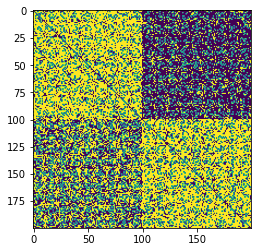

Calculating PHATE...
  Running PHATE on 200 observations and 200 variables.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.07 seconds.
    Calculating KNN search...
    Calculating affinities...
  Calculated graph and diffusion operator in 0.09 seconds.
  Calculating optimal t...
    Automatically selected t = 9
  Calculated optimal t in 0.01 seconds.
  Calculating diffusion potential...
  Calculating metric MDS...
  Calculated metric MDS in 0.02 seconds.
Calculated PHATE in 0.14 seconds.


/tmp/ipykernel_260210/1745588441.py:14: DeprecationWarning: Call to deprecated function (or staticmethod) scatter. (Use scprep.plot.scatter instead) -- Deprecated since version 1.0.0.
  phate.plot.scatter(data_phate[:,0],data_phate[:,1], c=clusters)


<AxesSubplot:xlabel='PHATE1', ylabel='PHATE2'>

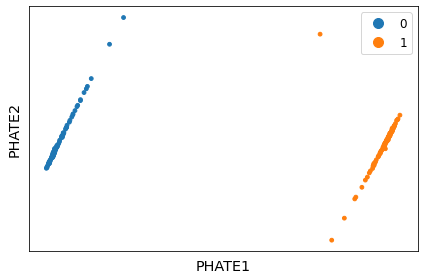

In [6]:
dataset = StochasticHuge()
data = dataset[0]
# visualize_graph(data)
visualize_heatmap(data.edge_index)

sparse_A = torch.sparse_coo_tensor(data.edge_index, torch.ones(data.edge_index.shape[1]))
A = sparse_A.to_dense()
A = A.numpy()

phate_op = phate.PHATE()
data_phate = phate_op.fit_transform(A)
clusters = np.repeat([0,1],100)

phate.plot.scatter(data_phate[:,0],data_phate[:,1], c=clusters)


### PHATE on Shady Al

In [7]:
def brute_tesfa_shadyal_obama():
    num_nodes = 14
    adj_mat = [[0 for y in range(num_nodes)] for x in range(num_nodes)]

    # 0: Obama
    # 1-6: Tesfa
    # 7: shady-al
    # 8-13: bots
    
    # everyone (except bots) in graph is connected to Obama
    for i in range(1, 8):
        adj_mat[i][0] = 1


    # everyone in Tesfa's circle is connected
    for i in range(1,7):
        for j in range(1,7):
            if i != j:
                adj_mat[i][j] = 1
    
    # shady-al's bots are connected to shady-al
    for i in range(8,14):
        adj_mat[i][7] = 1

    return adj_mat

class shadyal(InMemoryDataset):
  def __init__(self,num_nodes = 10,transform=None):
    super().__init__(".", transform)
    dense_adj = torch.tensor(brute_tesfa_shadyal_obama())
    sparse_adj = SparseTensor.from_dense(dense_adj)
    row, col, _ = sparse_adj.coo()
    edge_index, _ = remove_self_loops(torch.stack([row, col]))

    x = torch.eye(num_nodes, dtype=torch.float)
    data = Data(x=x, edge_index=edge_index)
    self.data, self.slices = self.collate([data])

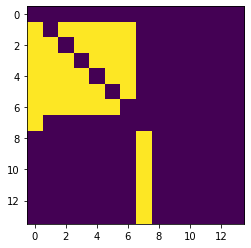

In [8]:
dataset = shadyal()
data = dataset[0]
# visualize_graph(data)
visualize_heatmap(data.edge_index)

Calculating PHATE...
  Running PHATE on 14 observations and 14 variables.
  Calculating graph and diffusion operator...
    Calculating KNN search...
    Calculated KNN search in 0.03 seconds.
    Calculating affinities...
  Calculated graph and diffusion operator in 0.03 seconds.
  Calculating optimal t...
    Automatically selected t = 4
  Calculating diffusion potential...
  Calculating metric MDS...
Calculated PHATE in 0.05 seconds.
[[-2.33075275e-01  6.08999396e-03]
 [ 3.08588820e-01 -1.72453916e-04]
 [ 3.08592720e-01  3.10323296e-05]
 [ 3.08560838e-01  1.48125113e-04]
 [ 3.08575896e-01 -1.05651824e-04]
 [ 3.08599426e-01  1.27991837e-04]
 [ 3.08577291e-01 -2.92598736e-05]
 [-2.33078220e-01 -6.07745181e-03]
 [-2.30887903e-01 -6.30674882e-06]
 [-2.30890232e-01 -2.41631496e-06]
 [-2.30891907e-01 -2.05228555e-06]
 [-2.30889621e-01 -3.21737870e-06]
 [-2.30888343e-01 -6.47413420e-06]
 [-2.30893490e-01  8.14104125e-06]]


/gpfs/ysm/project/sumry2022/sumry2022_gt392/conda_envs/test/lib/python3.9/site-packages/graphtools/graphs.py:287: RuntimeWarning: Detected zero distance between 15 pairs of samples. Consider removing duplicates to avoid errors in downstream processing.
  warnings.warn(
/gpfs/ysm/project/sumry2022/sumry2022_gt392/conda_envs/test/lib/python3.9/site-packages/graphtools/graphs.py:451: RuntimeWarning: overflow encountered in power
  K.data = np.exp(-1 * np.power(K.data, self.decay))
/tmp/ipykernel_260210/1136887246.py:15: DeprecationWarning: Call to deprecated function (or staticmethod) scatter. (Use scprep.plot.scatter instead) -- Deprecated since version 1.0.0.
  phate.plot.scatter(data_phate[:,0],data_phate[:,1], c = clusters)


<AxesSubplot:xlabel='PHATE1', ylabel='PHATE2'>

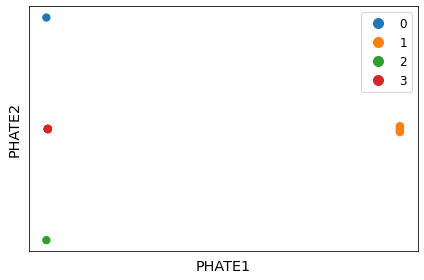

In [9]:
data = brute_tesfa_shadyal_obama()
data = np.array(data)

phate_op = phate.PHATE()
data_phate = phate_op.fit_transform(data)

print(data_phate)

# 0: Obama
# 1-6: Tesfa
# 7: shady-al
# 8-13: bots
clusters = [0,1,1,1,1,1,1,2,3,3,3,3,3,3]

phate.plot.scatter(data_phate[:,0],data_phate[:,1], c = clusters)

# Experimenting with RNA Velocity

In [10]:
import sys
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import loompy
import velocyto as vcy
import logging
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from statsmodels.nonparametric.smoothers_lowess import lowess
from scipy.interpolate import interp1d

logging.basicConfig(stream=sys.stdout, format='%(asctime)s - %(levelname)s - %(message)s', level=logging.DEBUG)
%matplotlib inline
plt.rcParams['pdf.fonttype'] = 42

# plotting utility functions
def despline():
    ax1 = plt.gca()
    # Hide the right and top spines
    ax1.spines['right'].set_visible(False)
    ax1.spines['top'].set_visible(False)
    # Only show ticks on the left and bottom spines
    ax1.yaxis.set_ticks_position('left')
    ax1.xaxis.set_ticks_position('bottom')
    
def minimal_xticks(start, end):
    end_ = np.around(end, -int(np.log10(end))+1)
    xlims = np.linspace(start, end_, 5)
    xlims_tx = [""]*len(xlims)
    xlims_tx[0], xlims_tx[-1] = f"{xlims[0]:.0f}", f"{xlims[-1]:.02f}"
    plt.xticks(xlims, xlims_tx)

    
def minimal_yticks(start, end):
    end_ = np.around(end, -int(np.log10(end))+1)
    ylims = np.linspace(start, end_, 5)
    ylims_tx = [""]*len(ylims)
    ylims_tx[0], ylims_tx[-1] = f"{ylims[0]:.0f}", f"{ylims[-1]:.02f}"
    plt.yticks(ylims, ylims_tx)
    
!mkdir data

from urllib.request import urlretrieve
urlretrieve("http://pklab.med.harvard.edu/velocyto/DentateGyrus/DentateGyrus.loom", "data/DentateGyrus.loom")

# Crate an analysis object
vlm = vcy.VelocytoLoom("data/DentateGyrus.loom")

# Read column attributes form the loom file and specify colors
vlm.ts = np.column_stack([vlm.ca["TSNE1"], vlm.ca["TSNE2"]])
colors_dict = {'RadialGlia': np.array([ 0.95,  0.6,  0.1]), 'RadialGlia2': np.array([ 0.85,  0.3,  0.1]), 'ImmAstro': np.array([ 0.8,  0.02,  0.1]),
              'GlialProg': np.array([ 0.81,  0.43,  0.72352941]), 'OPC': np.array([ 0.61,  0.13,  0.72352941]), 'nIPC': np.array([ 0.9,  0.8 ,  0.3]),
              'Nbl1': np.array([ 0.7,  0.82 ,  0.6]), 'Nbl2': np.array([ 0.448,  0.85490196,  0.95098039]),  'ImmGranule1': np.array([ 0.35,  0.4,  0.82]),
              'ImmGranule2': np.array([ 0.23,  0.3,  0.7]), 'Granule': np.array([ 0.05,  0.11,  0.51]), 'CA': np.array([ 0.2,  0.53,  0.71]),
               'CA1-Sub': np.array([ 0.1,  0.45,  0.3]), 'CA2-3-4': np.array([ 0.3,  0.35,  0.5])}
vlm.set_clusters(vlm.ca["ClusterName"], cluster_colors_dict=colors_dict)

OMP: Info #277: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


2022-06-30 10:54:22,152 - DEBUG - Loaded backend module://matplotlib_inline.backend_inline version unknown.
mkdir: cannot create directory ‘data’: File exists
2022-06-30 10:54:44,261 - DEBUG - Creating converter from 3 to 5


## Velocity Analysis

2022-06-30 10:54:54,825 - DEBUG - findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=13.0.
2022-06-30 10:54:54,827 - DEBUG - findfont: score(FontEntry(fname='/gpfs/ysm/project/sumry2022/sumry2022_gt392/conda_envs/test/lib/python3.9/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans-Oblique.ttf', name='DejaVu Sans', style='oblique', variant='normal', weight=400, stretch='normal', size='scalable')) = 1.05
2022-06-30 10:54:54,828 - DEBUG - findfont: score(FontEntry(fname='/gpfs/ysm/project/sumry2022/sumry2022_gt392/conda_envs/test/lib/python3.9/site-packages/matplotlib/mpl-data/fonts/ttf/cmss10.ttf', name='cmss10', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2022-06-30 10:54:54,829 - DEBUG - findfont: score(FontEntry(fname='/gpfs/ysm/project/sumry2022/sumry2022_gt392/conda_envs/test/lib/python3.9/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans-BoldOblique.ttf', name='DejaVu Sans', style='obl

2022-06-30 10:54:54,847 - DEBUG - findfont: score(FontEntry(fname='/gpfs/ysm/project/sumry2022/sumry2022_gt392/conda_envs/test/lib/python3.9/site-packages/matplotlib/mpl-data/fonts/ttf/STIXGeneralBol.ttf', name='STIXGeneral', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
2022-06-30 10:54:54,847 - DEBUG - findfont: score(FontEntry(fname='/gpfs/ysm/project/sumry2022/sumry2022_gt392/conda_envs/test/lib/python3.9/site-packages/matplotlib/mpl-data/fonts/ttf/STIXSizFiveSymReg.ttf', name='STIXSizeFiveSym', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2022-06-30 10:54:54,848 - DEBUG - findfont: score(FontEntry(fname='/gpfs/ysm/project/sumry2022/sumry2022_gt392/conda_envs/test/lib/python3.9/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSerif-Italic.ttf', name='DejaVu Serif', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
2022-06-30 10:54:54,849 - DEBUG - findf

2022-06-30 10:54:54,865 - DEBUG - findfont: score(FontEntry(fname='/usr/share/fonts/culmus/SimpleCLM-Medium.ttf', name='Simple CLM', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2022-06-30 10:54:54,866 - DEBUG - findfont: score(FontEntry(fname='/usr/share/fonts/urw-base35/P052-Bold.otf', name='P052', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
2022-06-30 10:54:54,867 - DEBUG - findfont: score(FontEntry(fname='/usr/share/fonts/urw-base35/NimbusSansNarrow-Bold.otf', name='Nimbus Sans Narrow', style='normal', variant='normal', weight=700, stretch='condensed', size='scalable')) = 10.535
2022-06-30 10:54:54,867 - DEBUG - findfont: score(FontEntry(fname='/usr/share/fonts/urw-base35/NimbusSans-Italic.otf', name='Nimbus Sans', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
2022-06-30 10:54:54,868 - DEBUG - findfont: score(FontEntry(fname='/usr/share/fonts/urw-b

2022-06-30 10:54:54,887 - DEBUG - findfont: score(FontEntry(fname='/usr/share/fonts/dejavu/DejaVuSans-BoldOblique.ttf', name='DejaVu Sans', style='oblique', variant='normal', weight=700, stretch='normal', size='scalable')) = 1.335
2022-06-30 10:54:54,888 - DEBUG - findfont: score(FontEntry(fname='/gpfs/ysm/project/sumry2022/sumry2022_gt392/conda_envs/test/fonts/SourceCodePro-Bold.ttf', name='Source Code Pro', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
2022-06-30 10:54:54,888 - DEBUG - findfont: score(FontEntry(fname='/usr/share/fonts/dejavu/DejaVuSansMono.ttf', name='DejaVu Sans Mono', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2022-06-30 10:54:54,889 - DEBUG - findfont: score(FontEntry(fname='/usr/share/fonts/urw-base35/NimbusSansNarrow-Oblique.otf', name='Nimbus Sans Narrow', style='oblique', variant='normal', weight=400, stretch='condensed', size='scalable')) = 11.25
2022-06-30 10:54:54,88

2022-06-30 10:54:54,914 - DEBUG - findfont: score(FontEntry(fname='/usr/share/fonts/dejavu/DejaVuSansMono-Bold.ttf', name='DejaVu Sans Mono', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
2022-06-30 10:54:54,915 - DEBUG - findfont: score(FontEntry(fname='/gpfs/ysm/project/sumry2022/sumry2022_gt392/conda_envs/test/fonts/SourceCodePro-MediumIt.ttf', name='Source Code Pro', style='italic', variant='normal', weight=500, stretch='normal', size='scalable')) = 11.145
2022-06-30 10:54:54,915 - DEBUG - findfont: score(FontEntry(fname='/usr/share/fonts/urw-base35/URWBookman-Demi.otf', name='URW Bookman', style='normal', variant='normal', weight=600, stretch='normal', size='scalable')) = 10.24
2022-06-30 10:54:54,916 - DEBUG - findfont: score(FontEntry(fname='/usr/share/fonts/urw-base35/C059-Italic.otf', name='C059', style='italic', variant='normal', weight=400, stretch='normal', size='scalable')) = 11.05
2022-06-30 10:54:54,916 - DEBUG - findfont: sco

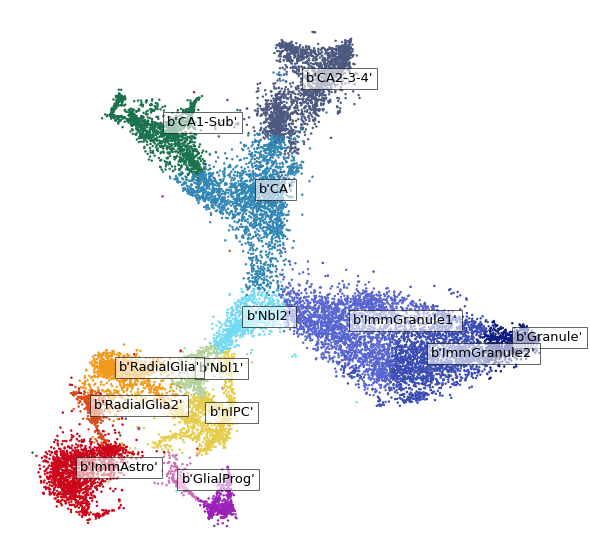

In [11]:
# Plot TSNE
plt.figure(figsize=(10,10))
vcy.scatter_viz(vlm.ts[:,0], vlm.ts[:,1], c=vlm.colorandum, s=2)
for i in range(max(vlm.ca["Clusters"])):
    ts_m = np.median(vlm.ts[vlm.ca["Clusters"] == i, :], 0)
    plt.text(ts_m[0], ts_m[1], str(vlm.cluster_labels[vlm.ca["Clusters"] == i][0]),
             fontsize=13, bbox={"facecolor":"w", "alpha":0.6})
plt.axis("off");

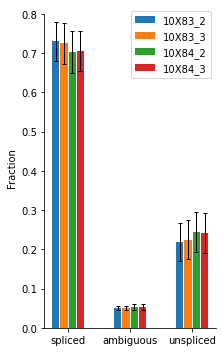

In [12]:
vlm.plot_fractions()

In [13]:
vlm.filter_cells(bool_array=vlm.initial_Ucell_size > np.percentile(vlm.initial_Ucell_size, 0.4))

In [14]:
vlm.ts = np.column_stack([vlm.ca["TSNE1"], vlm.ca["TSNE2"]])

In [15]:
vlm.score_detection_levels(min_expr_counts=40, min_cells_express=30)
vlm.filter_genes(by_detection_levels=True)

2022-06-30 10:55:06,801 - DEBUG - Filtering by detection level


2022-06-30 10:55:09,862 - DEBUG - svr_gamma set to 0.010838933448948623
2022-06-30 10:55:19,281 - DEBUG - Filtering by cv vs mean


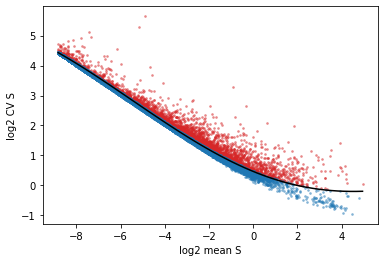

In [16]:
vlm.score_cv_vs_mean(3000, plot=True, max_expr_avg=35)
vlm.filter_genes(by_cv_vs_mean=True)

In [17]:
vlm.score_detection_levels(min_expr_counts=0, min_cells_express=0, min_expr_counts_U=25, min_cells_express_U=20)
vlm.score_cluster_expression(min_avg_U=0.01, min_avg_S=0.08)
vlm.filter_genes(by_detection_levels=True, by_cluster_expression=True)

2022-06-30 10:55:19,607 - INFO - Cluster: b'CA' (2295 cells)
2022-06-30 10:55:19,695 - INFO - Cluster: b'CA1-Sub' (1647 cells)
2022-06-30 10:55:19,763 - INFO - Cluster: b'CA2-3-4' (2127 cells)
2022-06-30 10:55:19,850 - INFO - Cluster: b'GlialProg' (227 cells)
2022-06-30 10:55:19,863 - INFO - Cluster: b'Granule' (863 cells)
2022-06-30 10:55:19,901 - INFO - Cluster: b'ImmAstro' (1786 cells)
2022-06-30 10:55:19,973 - INFO - Cluster: b'ImmGranule1' (2459 cells)
2022-06-30 10:55:20,069 - INFO - Cluster: b'ImmGranule2' (2098 cells)
2022-06-30 10:55:20,151 - INFO - Cluster: b'Nbl1' (410 cells)
2022-06-30 10:55:20,174 - INFO - Cluster: b'Nbl2' (1003 cells)
2022-06-30 10:55:20,219 - INFO - Cluster: b'OPC' (595 cells)
2022-06-30 10:55:20,248 - INFO - Cluster: b'RadialGlia' (1039 cells)
2022-06-30 10:55:20,294 - INFO - Cluster: b'RadialGlia2' (388 cells)
2022-06-30 10:55:20,314 - INFO - Cluster: b'nIPC' (1203 cells)
2022-06-30 10:55:20,367 - DEBUG - Filtering by cluster expression
2022-06-30 10:5

In [18]:
# best with sample and expression scaling
vlm._normalize_S(relative_size=vlm.initial_cell_size,
                 target_size=np.mean(vlm.initial_cell_size))
vlm._normalize_U(relative_size=vlm.initial_Ucell_size,
                 target_size=np.mean(vlm.initial_Ucell_size))

19

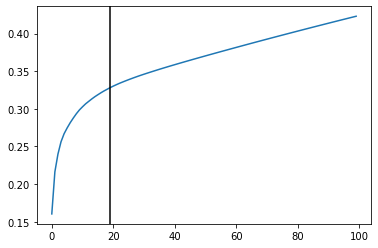

In [19]:
vlm.perform_PCA()
plt.plot(np.cumsum(vlm.pca.explained_variance_ratio_)[:100])
n_comps = np.where(np.diff(np.diff(np.cumsum(vlm.pca.explained_variance_ratio_))>0.002))[0][0]
plt.axvline(n_comps, c="k")
n_comps

In [20]:
k = 500
vlm.knn_imputation(n_pca_dims=n_comps, k=k, balanced=True, b_sight=k*8, b_maxl=k*4, n_jobs=16)

2022-06-30 10:55:24,468 - DEBUG - First search the 4000 nearest neighbours for 18140
2022-06-30 10:55:27,628 - DEBUG - Using the initialization network to find a 500-NN graph with maximum connectivity of 2000
2022-06-30 10:55:28,190 - DEBUG - Returning sparse matrix


In [21]:
vlm.fit_gammas(limit_gamma=False, fit_offset=False)

In [22]:
vlm.predict_U()
vlm.calculate_velocity()
vlm.calculate_shift(assumption="constant_velocity")
vlm.extrapolate_cell_at_t(delta_t=1.)

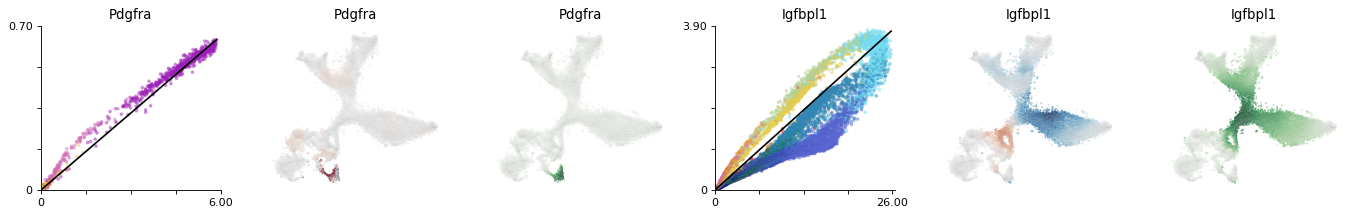

In [23]:
plt.figure(None, (17,2.8), dpi=80)
gs = plt.GridSpec(1,6)
for i, gn in enumerate(["Pdgfra","Igfbpl1"]):
    ax = plt.subplot(gs[i*3])
    try:
        ix=np.where(vlm.ra["Gene"] == gn)[0][0]
    except:
        continue
    vcy.scatter_viz(vlm.Sx_sz[ix,:], vlm.Ux_sz[ix,:], c=vlm.colorandum, s=5, alpha=0.4, rasterized=True)
    plt.title(gn)
    xnew = np.linspace(0,vlm.Sx[ix,:].max())
    plt.plot(xnew, vlm.gammas[ix] * xnew + vlm.q[ix], c="k")
    plt.ylim(0, np.max(vlm.Ux_sz[ix,:])*1.02)
    plt.xlim(0, np.max(vlm.Sx_sz[ix,:])*1.02)
    minimal_yticks(0, np.max(vlm.Ux_sz[ix,:])*1.02)
    minimal_xticks(0, np.max(vlm.Sx_sz[ix,:])*1.02)
    despline()
    
    vlm.plot_velocity_as_color(gene_name=gn, gs=gs[i*3+1], s=3, rasterized=True)

    vlm.plot_expression_as_color(gene_name=gn, gs=gs[i*3+2], s=3, rasterized=True)
    
plt.tight_layout()

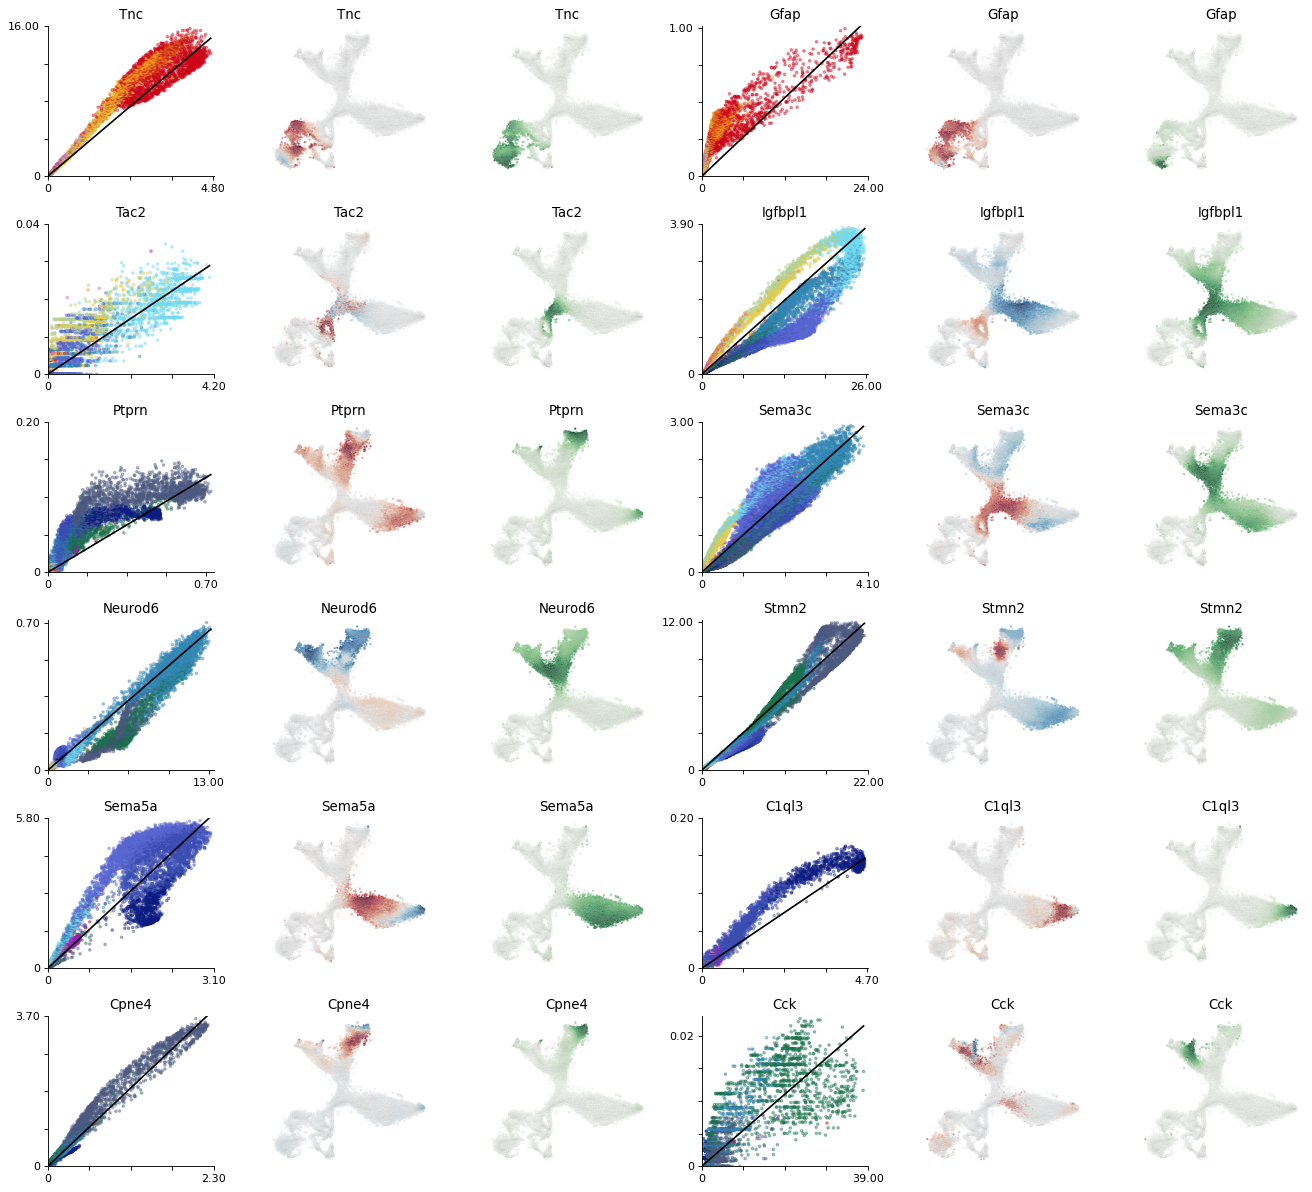

In [24]:
plt.figure(None, (16.5,15), dpi=80)
gs = plt.GridSpec(6,6)
for i, gn in enumerate(["Tnc", "Gfap", "Tac2","Igfbpl1", 'Ptprn',
                        "Sema3c", "Neurod6", "Stmn2", "Sema5a", "C1ql3", "Cpne4", "Cck"]):
    ax = plt.subplot(gs[i*3])
    try:
        ix=np.where(vlm.ra["Gene"] == gn)[0][0]
    except:
        continue
    vcy.scatter_viz(vlm.Sx_sz[ix,:], vlm.Ux_sz[ix,:], c=vlm.colorandum, s=5, alpha=0.4, rasterized=True)
    plt.title(gn)
    xnew = np.linspace(0,vlm.Sx[ix,:].max())
    plt.plot(xnew, vlm.gammas[ix] * xnew + vlm.q[ix], c="k")
    plt.ylim(0, np.max(vlm.Ux_sz[ix,:])*1.02)
    plt.xlim(0, np.max(vlm.Sx_sz[ix,:])*1.02)
    minimal_yticks(0, np.max(vlm.Ux_sz[ix,:])*1.02)
    minimal_xticks(0, np.max(vlm.Sx_sz[ix,:])*1.02)
    despline()
    
    vlm.plot_velocity_as_color(gene_name=gn, gs=gs[i*3+1], s=3, rasterized=True)

    vlm.plot_expression_as_color(gene_name=gn, gs=gs[i*3+2], s=3, rasterized=True)
    
plt.tight_layout()

In [25]:
vlm.estimate_transition_prob(hidim="Sx_sz", embed="ts", transform="sqrt", psc=1,
                             n_neighbors=2000, knn_random=True, sampled_fraction=0.5)

2022-06-30 10:57:27,422 - DEBUG - bytecode dump:
>          0	NOP(arg=None, lineno=2415)
           2	LOAD_GLOBAL(arg=0, lineno=2415)
           4	LOAD_ATTR(arg=1, lineno=2415)
           6	LOAD_METHOD(arg=2, lineno=2415)
           8	LOAD_FAST(arg=0, lineno=2415)
          10	CALL_METHOD(arg=1, lineno=2415)
          12	POP_TOP(arg=None, lineno=2415)
          14	LOAD_CONST(arg=1, lineno=2415)
          16	RETURN_VALUE(arg=None, lineno=2415)
2022-06-30 10:57:27,424 - DEBUG - pending: deque([State(pc_initial=0 nstack_initial=0)])
2022-06-30 10:57:27,425 - DEBUG - stack: []
2022-06-30 10:57:27,426 - DEBUG - dispatch pc=0, inst=NOP(arg=None, lineno=2415)
2022-06-30 10:57:27,427 - DEBUG - stack []
2022-06-30 10:57:27,427 - DEBUG - dispatch pc=2, inst=LOAD_GLOBAL(arg=0, lineno=2415)
2022-06-30 10:57:27,428 - DEBUG - stack []
2022-06-30 10:57:27,428 - DEBUG - dispatch pc=4, inst=LOAD_ATTR(arg=1, lineno=2415)
2022-06-30 10:57:27,429 - DEBUG - stack ['$2load_global.0']
2022-06-30 10:57:27,430

2022-06-30 10:57:27,477 - DEBUG - ==== SSA block analysis pass on 0
2022-06-30 10:57:27,477 - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x2b006febbaf0>
2022-06-30 10:57:27,478 - DEBUG - on stmt: tmp0 = arg(0, name=tmp0)
2022-06-30 10:57:27,480 - DEBUG - on stmt: $2load_global.0 = global(intrin: <intrinsic stub>)
2022-06-30 10:57:27,481 - DEBUG - on stmt: $6call_function.2 = call $2load_global.0(tmp0, func=$2load_global.0, args=[Var(tmp0, <string>:3)], kws=(), vararg=None, target=None)
2022-06-30 10:57:27,481 - DEBUG - on stmt: $8return_value.3 = cast(value=$6call_function.2)
2022-06-30 10:57:27,482 - DEBUG - on stmt: return $8return_value.3
2022-06-30 10:57:27,482 - DEBUG - defs defaultdict(<class 'list'>,
            {'$2load_global.0': [<numba.core.ir.Assign object at 0x2b006fc39a00>],
             '$6call_function.2': [<numba.core.ir.Assign object at 0x2b006fcb4160>],
             '$8return_value.3': [<numba.core.ir.Assign object at 0x2b006fcb4310>],
             

2022-06-30 10:57:27,802 - DEBUG - stack ['$phi32.0', '$38load_method.4', '$A40.5']
2022-06-30 10:57:27,802 - DEBUG - dispatch pc=44, inst=LOAD_CONST(arg=4, lineno=2424)
2022-06-30 10:57:27,806 - DEBUG - stack ['$phi32.0', '$38load_method.4', '$A40.5', '$i42.6']
2022-06-30 10:57:27,806 - DEBUG - dispatch pc=46, inst=LOAD_CONST(arg=4, lineno=2424)
2022-06-30 10:57:27,807 - DEBUG - stack ['$phi32.0', '$38load_method.4', '$A40.5', '$i42.6', '$const44.7']
2022-06-30 10:57:27,807 - DEBUG - dispatch pc=48, inst=BUILD_SLICE(arg=2, lineno=2424)
2022-06-30 10:57:27,808 - DEBUG - stack ['$phi32.0', '$38load_method.4', '$A40.5', '$i42.6', '$const44.7', '$const46.8']
2022-06-30 10:57:27,808 - DEBUG - dispatch pc=50, inst=BUILD_TUPLE(arg=2, lineno=2424)
2022-06-30 10:57:27,809 - DEBUG - stack ['$phi32.0', '$38load_method.4', '$A40.5', '$i42.6', '$48build_slice.10']
2022-06-30 10:57:27,809 - DEBUG - dispatch pc=52, inst=BINARY_SUBSCR(arg=None, lineno=2424)
2022-06-30 10:57:27,810 - DEBUG - stack ['$p

2022-06-30 10:57:27,847 - DEBUG - changing phismap: defaultdict(<class 'set'>,
            {'$phi30.0': {('$28get_iter.12',
                           State(pc_initial=0 nstack_initial=0))},
             '$phi32.0': {('$28get_iter.12',
                           State(pc_initial=0 nstack_initial=0))},
             '$phi32.1': {('$30for_iter.2',
                           State(pc_initial=30 nstack_initial=1))}})
2022-06-30 10:57:27,848 - DEBUG - keep phismap: {'$phi30.0': {('$28get_iter.12', State(pc_initial=0 nstack_initial=0))},
 '$phi32.1': {('$30for_iter.2', State(pc_initial=30 nstack_initial=1))}}
2022-06-30 10:57:27,848 - DEBUG - new_out: defaultdict(<class 'dict'>,
            {State(pc_initial=0 nstack_initial=0): {'$phi30.0': '$28get_iter.12'},
             State(pc_initial=30 nstack_initial=1): {'$phi32.1': '$30for_iter.2'}})
2022-06-30 10:57:27,849 - DEBUG - ----------------------DONE Prune PHIs-----------------------
2022-06-30 10:57:27,849 - DEBUG - block_infos State(pc_in

2022-06-30 10:57:27,859 - DEBUG - ==== SSA block analysis pass on 0
2022-06-30 10:57:27,862 - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x2b0087616760>
2022-06-30 10:57:27,863 - DEBUG - on stmt: A = arg(0, name=A)
2022-06-30 10:57:27,863 - DEBUG - on stmt: $2load_global.0 = global(np: <module 'numpy' from '/gpfs/ysm/project/sumry2022/sumry2022_gt392/conda_envs/test/lib/python3.9/site-packages/numpy/__init__.py'>)
2022-06-30 10:57:27,863 - DEBUG - on stmt: $4load_method.1 = getattr(value=$2load_global.0, attr=array)
2022-06-30 10:57:27,864 - DEBUG - on stmt: $const6.2 = const(int, 1)
2022-06-30 10:57:27,864 - DEBUG - on stmt: $const8.3 = const(int, -1)
2022-06-30 10:57:27,865 - DEBUG - on stmt: $10build_list.4 = build_list(items=[Var($const6.2, analysis.py:2422), Var($const8.3, analysis.py:2422)])
2022-06-30 10:57:27,865 - DEBUG - on stmt: plmi = call $4load_method.1($10build_list.4, func=$4load_method.1, args=[Var($10build_list.4, analysis.py:2422)], kws=(), vararg=N

2022-06-30 10:57:27,894 - DEBUG - SSA violators set()
2022-06-30 10:57:27,899 - DEBUG - bytecode dump:
>          0	NOP(arg=None, lineno=3)
           2	LOAD_GLOBAL(arg=0, lineno=3)
           4	LOAD_FAST(arg=0, lineno=3)
           6	CALL_FUNCTION(arg=1, lineno=3)
           8	RETURN_VALUE(arg=None, lineno=3)
2022-06-30 10:57:27,899 - DEBUG - pending: deque([State(pc_initial=0 nstack_initial=0)])
2022-06-30 10:57:27,899 - DEBUG - stack: []
2022-06-30 10:57:27,900 - DEBUG - dispatch pc=0, inst=NOP(arg=None, lineno=3)
2022-06-30 10:57:27,900 - DEBUG - stack []
2022-06-30 10:57:27,901 - DEBUG - dispatch pc=2, inst=LOAD_GLOBAL(arg=0, lineno=3)
2022-06-30 10:57:27,901 - DEBUG - stack []
2022-06-30 10:57:27,901 - DEBUG - dispatch pc=4, inst=LOAD_FAST(arg=0, lineno=3)
2022-06-30 10:57:27,902 - DEBUG - stack ['$2load_global.0']
2022-06-30 10:57:27,902 - DEBUG - dispatch pc=6, inst=CALL_FUNCTION(arg=1, lineno=3)
2022-06-30 10:57:27,902 - DEBUG - stack ['$2load_global.0', '$tmp04.1']
2022-06-30

2022-06-30 10:57:27,972 - DEBUG - stack ['$24load_deref.0']
2022-06-30 10:57:27,973 - DEBUG - dispatch pc=28, inst=LOAD_CONST(arg=2, lineno=1217)
2022-06-30 10:57:27,974 - DEBUG - stack ['$24load_deref.0', '$i26.1']
2022-06-30 10:57:27,980 - DEBUG - dispatch pc=30, inst=BINARY_ADD(arg=None, lineno=1217)
2022-06-30 10:57:27,981 - DEBUG - stack ['$24load_deref.0', '$i26.1', '$const28.2']
2022-06-30 10:57:27,982 - DEBUG - dispatch pc=32, inst=CALL_FUNCTION(arg=1, lineno=1217)
2022-06-30 10:57:27,982 - DEBUG - stack ['$24load_deref.0', '$30binary_add.3']
2022-06-30 10:57:27,983 - DEBUG - dispatch pc=34, inst=STORE_FAST(arg=2, lineno=1217)
2022-06-30 10:57:27,983 - DEBUG - stack ['$32call_function.4']
2022-06-30 10:57:27,984 - DEBUG - dispatch pc=36, inst=LOAD_FAST(arg=0, lineno=1218)
2022-06-30 10:57:27,985 - DEBUG - stack []
2022-06-30 10:57:27,986 - DEBUG - dispatch pc=38, inst=LOAD_FAST(arg=2, lineno=1218)
2022-06-30 10:57:27,987 - DEBUG - stack ['$arr36.5']
2022-06-30 10:57:27,987 - DE

2022-06-30 10:57:28,053 - DEBUG - ==== SSA block analysis pass on 0
2022-06-30 10:57:28,053 - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x2b006fc39be0>
2022-06-30 10:57:28,054 - DEBUG - on stmt: arr = arg(0, name=arr)
2022-06-30 10:57:28,054 - DEBUG - on stmt: $4load_attr.1 = getattr(value=arr, attr=shape)
2022-06-30 10:57:28,055 - DEBUG - on stmt: $const6.2 = const(int, 0)
2022-06-30 10:57:28,055 - DEBUG - on stmt: $8binary_subscr.3 = static_getitem(value=$4load_attr.1, index=0, index_var=$const6.2, fn=<built-in function getitem>)
2022-06-30 10:57:28,056 - DEBUG - on stmt: $const10.4 = const(int, 1)
2022-06-30 10:57:28,056 - DEBUG - on stmt: i = $8binary_subscr.3 - $const10.4
2022-06-30 10:57:28,056 - DEBUG - on stmt: jump 16
2022-06-30 10:57:28,057 - DEBUG - ==== SSA block analysis pass on 16
2022-06-30 10:57:28,057 - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x2b006fc39be0>
2022-06-30 10:57:28,058 - DEBUG - on stmt: $const18.1 = const(int, 0)
20

2022-06-30 10:57:28,083 - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x2b006fc39940>
2022-06-30 10:57:28,083 - DEBUG - on stmt: $const72.0 = const(NoneType, None)
2022-06-30 10:57:28,084 - DEBUG - on stmt: $74return_value.1 = cast(value=$const72.0)
2022-06-30 10:57:28,084 - DEBUG - on stmt: return $74return_value.1
2022-06-30 10:57:28,085 - DEBUG - Replaced assignments: defaultdict(<class 'list'>,
            {0: [<numba.core.ir.Assign object at 0x2b0087a99bb0>],
             24: [<numba.core.ir.Assign object at 0x2b0087a99fa0>]})
2022-06-30 10:57:28,085 - DEBUG - ==== SSA block rewrite pass on 0
2022-06-30 10:57:28,085 - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x2b0087a99fd0>
2022-06-30 10:57:28,086 - DEBUG - on stmt: arr = arg(0, name=arr)
2022-06-30 10:57:28,086 - DEBUG - on stmt: $4load_attr.1 = getattr(value=arr, attr=shape)
2022-06-30 10:57:28,087 - DEBUG - on stmt: $const6.2 = const(int, 0)
2022-06-30 10:57:28,087 - DEBUG - on stmt: $8binary_subscr.

2022-06-30 10:57:28,131 - DEBUG - label 0:
    tmp0 = arg(0, name=tmp0)                 ['tmp0']
    $2load_global.0 = global(intrin: <intrinsic stub>) ['$2load_global.0']
    $6call_function.2 = call $2load_global.0(tmp0, func=$2load_global.0, args=[Var(tmp0, <string>:3)], kws=(), vararg=None, target=None) ['$2load_global.0', '$6call_function.2', 'tmp0']
    $8return_value.3 = cast(value=$6call_function.2) ['$6call_function.2', '$8return_value.3']
    return $8return_value.3                  ['$8return_value.3']

2022-06-30 10:57:28,133 - DEBUG - ==== SSA block analysis pass on 0
2022-06-30 10:57:28,133 - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x2b0087aa35e0>
2022-06-30 10:57:28,133 - DEBUG - on stmt: tmp0 = arg(0, name=tmp0)
2022-06-30 10:57:28,134 - DEBUG - on stmt: $2load_global.0 = global(intrin: <intrinsic stub>)
2022-06-30 10:57:28,134 - DEBUG - on stmt: $6call_function.2 = call $2load_global.0(tmp0, func=$2load_global.0, args=[Var(tmp0, <string>:3)], kws=(

2022-06-30 10:57:28,229 - DEBUG - dispatch pc=32, inst=LOAD_GLOBAL(arg=3, lineno=1419)
2022-06-30 10:57:28,229 - DEBUG - stack []
2022-06-30 10:57:28,230 - DEBUG - dispatch pc=34, inst=LOAD_GLOBAL(arg=4, lineno=1419)
2022-06-30 10:57:28,230 - DEBUG - stack ['$32load_global.7']
2022-06-30 10:57:28,230 - DEBUG - dispatch pc=36, inst=LOAD_FAST(arg=5, lineno=1419)
2022-06-30 10:57:28,231 - DEBUG - stack ['$32load_global.7', '$34load_global.8']
2022-06-30 10:57:28,231 - DEBUG - dispatch pc=38, inst=CALL_FUNCTION(arg=1, lineno=1419)
2022-06-30 10:57:28,231 - DEBUG - stack ['$32load_global.7', '$34load_global.8', '$fl36.9']
2022-06-30 10:57:28,231 - DEBUG - dispatch pc=40, inst=CALL_FUNCTION(arg=1, lineno=1419)
2022-06-30 10:57:28,232 - DEBUG - stack ['$32load_global.7', '$38call_function.10']
2022-06-30 10:57:28,232 - DEBUG - dispatch pc=42, inst=GET_ITER(arg=None, lineno=1419)
2022-06-30 10:57:28,232 - DEBUG - stack ['$40call_function.11']
2022-06-30 10:57:28,232 - DEBUG - end state. edges=

2022-06-30 10:57:28,256 - DEBUG - dispatch pc=52, inst=LOAD_METHOD(arg=6, lineno=1420)
2022-06-30 10:57:28,256 - DEBUG - stack ['$phi46.0', '$50load_attr.3']
2022-06-30 10:57:28,257 - DEBUG - dispatch pc=54, inst=LOAD_CONST(arg=1, lineno=1420)
2022-06-30 10:57:28,257 - DEBUG - stack ['$phi46.0', '$52load_method.4']
2022-06-30 10:57:28,257 - DEBUG - dispatch pc=56, inst=LOAD_FAST(arg=3, lineno=1420)
2022-06-30 10:57:28,257 - DEBUG - stack ['$phi46.0', '$52load_method.4', '$const54.5']
2022-06-30 10:57:28,258 - DEBUG - dispatch pc=58, inst=CALL_METHOD(arg=2, lineno=1420)
2022-06-30 10:57:28,258 - DEBUG - stack ['$phi46.0', '$52load_method.4', '$const54.5', '$n56.6']
2022-06-30 10:57:28,258 - DEBUG - dispatch pc=60, inst=STORE_FAST(arg=7, lineno=1420)
2022-06-30 10:57:28,258 - DEBUG - stack ['$phi46.0', '$58call_method.7']
2022-06-30 10:57:28,259 - DEBUG - dispatch pc=62, inst=LOAD_DEREF(arg=2, lineno=1421)
2022-06-30 10:57:28,259 - DEBUG - stack ['$phi46.0']
2022-06-30 10:57:28,259 - DEB

2022-06-30 10:57:28,274 - DEBUG - changing phismap: defaultdict(<class 'set'>,
            {'$phi142.0': {('$140get_iter.12',
                            State(pc_initial=112 nstack_initial=0))},
             '$phi144.0': {('$140get_iter.12',
                            State(pc_initial=112 nstack_initial=0))},
             '$phi144.1': {('$142for_iter.2',
                            State(pc_initial=142 nstack_initial=1))},
             '$phi44.0': {('$42get_iter.12',
                           State(pc_initial=14 nstack_initial=0))},
             '$phi46.0': {('$42get_iter.12',
                           State(pc_initial=14 nstack_initial=0))},
             '$phi46.1': {('$44for_iter.2',
                           State(pc_initial=44 nstack_initial=1))}})
2022-06-30 10:57:28,274 - DEBUG - keep phismap: {'$phi142.0': {('$140get_iter.12', State(pc_initial=112 nstack_initial=0))},
 '$phi144.1': {('$142for_iter.2', State(pc_initial=142 nstack_initial=1))},
 '$phi44.0': {('$42get_iter.12'

2022-06-30 10:57:28,289 - DEBUG - ==== SSA block analysis pass on 0
2022-06-30 10:57:28,300 - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x2b0087b26ac0>
2022-06-30 10:57:28,301 - DEBUG - on stmt: a = arg(0, name=a)
2022-06-30 10:57:28,301 - DEBUG - on stmt: size = arg(1, name=size)
2022-06-30 10:57:28,302 - DEBUG - on stmt: replace = arg(2, name=replace)
2022-06-30 10:57:28,302 - DEBUG - on stmt: $2load_deref.0 = freevar(get_source_size: <function choice.<locals>.get_source_size at 0x2b00876df670>)
2022-06-30 10:57:28,303 - DEBUG - on stmt: n = call $2load_deref.0(a, func=$2load_deref.0, args=[Var(a, randomimpl.py:1415)], kws=(), vararg=None, target=None)
2022-06-30 10:57:28,303 - DEBUG - on stmt: bool12 = global(bool: <class 'bool'>)
2022-06-30 10:57:28,304 - DEBUG - on stmt: $12pred = call bool12(replace, func=bool12, args=(Var(replace, randomimpl.py:1415),), kws=(), vararg=None, target=None)
2022-06-30 10:57:28,304 - DEBUG - on stmt: branch $12pred, 14, 82
2022-06-

2022-06-30 10:57:28,333 - DEBUG - on stmt: $138call_function.11 = call $130load_global.7($136call_function.10, func=$130load_global.7, args=[Var($136call_function.10, randomimpl.py:1437)], kws=(), vararg=None, target=None)
2022-06-30 10:57:28,333 - DEBUG - on stmt: $140get_iter.12 = getiter(value=$138call_function.11)
2022-06-30 10:57:28,333 - DEBUG - on stmt: $phi142.0 = $140get_iter.12
2022-06-30 10:57:28,334 - DEBUG - on stmt: jump 142
2022-06-30 10:57:28,334 - DEBUG - ==== SSA block analysis pass on 142
2022-06-30 10:57:28,334 - DEBUG - Running <numba.core.ssa._GatherDefsHandler object at 0x2b0087b26ac0>
2022-06-30 10:57:28,335 - DEBUG - on stmt: $142for_iter.1 = iternext(value=$phi142.0)
2022-06-30 10:57:28,335 - DEBUG - on stmt: $142for_iter.2 = pair_first(value=$142for_iter.1)
2022-06-30 10:57:28,336 - DEBUG - on stmt: $142for_iter.3 = pair_second(value=$142for_iter.1)
2022-06-30 10:57:28,336 - DEBUG - on stmt: $phi144.1 = $142for_iter.2
2022-06-30 10:57:28,337 - DEBUG - on stmt

2022-06-30 10:57:28,348 - DEBUG - on stmt: $16load_method.1 = getattr(value=$14load_global.0, attr=empty)
2022-06-30 10:57:28,348 - DEBUG - on stmt: $20load_deref.3 = freevar(dtype: int64)
2022-06-30 10:57:28,348 - DEBUG - on stmt: out = call $16load_method.1(size, $20load_deref.3, func=$16load_method.1, args=[Var(size, randomimpl.py:1415), Var($20load_deref.3, randomimpl.py:1417)], kws=(), vararg=None, target=None)
2022-06-30 10:57:28,349 - DEBUG - first assign: out
2022-06-30 10:57:28,349 - DEBUG - replaced with: out = call $16load_method.1(size, $20load_deref.3, func=$16load_method.1, args=[Var(size, randomimpl.py:1415), Var($20load_deref.3, randomimpl.py:1417)], kws=(), vararg=None, target=None)
2022-06-30 10:57:28,349 - DEBUG - on stmt: fl = getattr(value=out, attr=flat)
2022-06-30 10:57:28,350 - DEBUG - on stmt: $32load_global.7 = global(range: <class 'range'>)
2022-06-30 10:57:28,350 - DEBUG - on stmt: $34load_global.8 = global(len: <built-in function len>)
2022-06-30 10:57:28,3

2022-06-30 10:57:28,374 - DEBUG - on stmt: $142for_iter.3 = pair_second(value=$142for_iter.1)
2022-06-30 10:57:28,375 - DEBUG - on stmt: $phi144.1 = $142for_iter.2
2022-06-30 10:57:28,375 - DEBUG - on stmt: branch $142for_iter.3, 144, 160
2022-06-30 10:57:28,375 - DEBUG - ==== SSA block rewrite pass on 144
2022-06-30 10:57:28,376 - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x2b006fe6e100>
2022-06-30 10:57:28,376 - DEBUG - on stmt: i = $phi144.1
2022-06-30 10:57:28,377 - DEBUG - on stmt: $150binary_subscr.4 = getitem(value=permuted_a, index=i, fn=<built-in function getitem>)
2022-06-30 10:57:28,377 - DEBUG - on stmt: fl[i] = $150binary_subscr.4
2022-06-30 10:57:28,377 - DEBUG - on stmt: jump 142
2022-06-30 10:57:28,378 - DEBUG - ==== SSA block rewrite pass on 160
2022-06-30 10:57:28,378 - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x2b006fe6e100>
2022-06-30 10:57:28,378 - DEBUG - on stmt: $162return_value.1 = cast(value=out)
2022-06-30 10:57:28,379 - DEB

2022-06-30 10:57:28,401 - DEBUG - ==== SSA block rewrite pass on 104
2022-06-30 10:57:28,402 - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x2b006fe6e100>
2022-06-30 10:57:28,402 - DEBUG - on stmt: $104load_global.0 = global(ValueError: <class 'ValueError'>)
2022-06-30 10:57:28,402 - DEBUG - on stmt: $const106.1 = const(str, Cannot take a larger sample than population when 'replace=False')
2022-06-30 10:57:28,403 - DEBUG - on stmt: $108call_function.2 = call $104load_global.0($const106.1, func=$104load_global.0, args=[Var($const106.1, randomimpl.py:1428)], kws=(), vararg=None, target=None)
2022-06-30 10:57:28,403 - DEBUG - on stmt: <static> raise <class 'ValueError'>("Cannot take a larger sample than population when 'replace=False'")
2022-06-30 10:57:28,403 - DEBUG - ==== SSA block rewrite pass on 112
2022-06-30 10:57:28,403 - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x2b006fe6e100>
2022-06-30 10:57:28,404 - DEBUG - on stmt: $112load_global.0 = global(np: <module

2022-06-30 10:57:28,428 - DEBUG - ==== SSA block rewrite pass on 46
2022-06-30 10:57:28,429 - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x2b0087b25280>
2022-06-30 10:57:28,429 - DEBUG - on stmt: i = $phi46.1
2022-06-30 10:57:28,430 - DEBUG - first assign: i
2022-06-30 10:57:28,431 - DEBUG - replaced with: i = $phi46.1
2022-06-30 10:57:28,431 - DEBUG - on stmt: $48load_global.2 = global(np: <module 'numpy' from '/gpfs/ysm/project/sumry2022/sumry2022_gt392/conda_envs/test/lib/python3.9/site-packages/numpy/__init__.py'>)
2022-06-30 10:57:28,432 - DEBUG - on stmt: $50load_attr.3 = getattr(value=$48load_global.2, attr=random)
2022-06-30 10:57:28,433 - DEBUG - on stmt: $52load_method.4 = getattr(value=$50load_attr.3, attr=randint)
2022-06-30 10:57:28,434 - DEBUG - on stmt: $const54.5 = const(int, 0)
2022-06-30 10:57:28,434 - DEBUG - on stmt: j = call $52load_method.4($const54.5, n, func=$52load_method.4, args=[Var($const54.5, randomimpl.py:1420), Var(n, randomimpl.py:1415)],

2022-06-30 10:57:28,500 - DEBUG - ==== SSA block rewrite pass on 14
2022-06-30 10:57:28,500 - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x2b0087b26d00>
2022-06-30 10:57:28,500 - DEBUG - on stmt: $14load_global.0 = global(np: <module 'numpy' from '/gpfs/ysm/project/sumry2022/sumry2022_gt392/conda_envs/test/lib/python3.9/site-packages/numpy/__init__.py'>)
2022-06-30 10:57:28,501 - DEBUG - on stmt: $16load_method.1 = getattr(value=$14load_global.0, attr=empty)
2022-06-30 10:57:28,501 - DEBUG - on stmt: $20load_deref.3 = freevar(dtype: int64)
2022-06-30 10:57:28,502 - DEBUG - on stmt: out = call $16load_method.1(size, $20load_deref.3, func=$16load_method.1, args=[Var(size, randomimpl.py:1415), Var($20load_deref.3, randomimpl.py:1417)], kws=(), vararg=None, target=None)
2022-06-30 10:57:28,502 - DEBUG - on stmt: fl = getattr(value=out, attr=flat)
2022-06-30 10:57:28,503 - DEBUG - on stmt: $32load_global.7 = global(range: <class 'range'>)
2022-06-30 10:57:28,503 - DEBUG - on stmt

2022-06-30 10:57:28,530 - DEBUG - on stmt: branch $142for_iter.3, 144, 160
2022-06-30 10:57:28,531 - DEBUG - ==== SSA block rewrite pass on 144
2022-06-30 10:57:28,531 - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x2b0087b26d00>
2022-06-30 10:57:28,531 - DEBUG - on stmt: i.1 = $phi144.1
2022-06-30 10:57:28,532 - DEBUG - on stmt: $150binary_subscr.4 = getitem(value=permuted_a, index=i, fn=<built-in function getitem>)
2022-06-30 10:57:28,532 - DEBUG - find_def var='i' stmt=$150binary_subscr.4 = getitem(value=permuted_a, index=i, fn=<built-in function getitem>)
2022-06-30 10:57:28,532 - DEBUG - replaced with: $150binary_subscr.4 = getitem(value=permuted_a, index=i.1, fn=<built-in function getitem>)
2022-06-30 10:57:28,533 - DEBUG - on stmt: fl[i] = $150binary_subscr.4
2022-06-30 10:57:28,533 - DEBUG - find_def var='i' stmt=fl[i] = $150binary_subscr.4
2022-06-30 10:57:28,534 - DEBUG - replaced with: fl[i.1] = $150binary_subscr.4
2022-06-30 10:57:28,534 - DEBUG - on stmt: jump 14

2022-06-30 10:57:28,559 - DEBUG - on stmt: <static> raise <class 'ValueError'>("Cannot take a larger sample than population when 'replace=False'")
2022-06-30 10:57:28,559 - DEBUG - ==== SSA block rewrite pass on 112
2022-06-30 10:57:28,559 - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x2b0087618d30>
2022-06-30 10:57:28,560 - DEBUG - on stmt: $112load_global.0 = global(np: <module 'numpy' from '/gpfs/ysm/project/sumry2022/sumry2022_gt392/conda_envs/test/lib/python3.9/site-packages/numpy/__init__.py'>)
2022-06-30 10:57:28,560 - DEBUG - on stmt: $114load_attr.1 = getattr(value=$112load_global.0, attr=random)
2022-06-30 10:57:28,560 - DEBUG - on stmt: $116load_method.2 = getattr(value=$114load_attr.1, attr=permutation)
2022-06-30 10:57:28,561 - DEBUG - on stmt: permuted_a = call $116load_method.2(a, func=$116load_method.2, args=[Var(a, randomimpl.py:1415)], kws=(), vararg=None, target=None)
2022-06-30 10:57:28,561 - DEBUG - on stmt: fl = getattr(value=out.1, attr=flat)
2022

2022-06-30 10:57:28,584 - DEBUG - on stmt: fl[i] = $68call_function.11
2022-06-30 10:57:28,584 - DEBUG - find_def var='fl' stmt=fl[i] = $68call_function.11
2022-06-30 10:57:28,584 - DEBUG - find_def_from_top label 46
2022-06-30 10:57:28,584 - DEBUG - idom 44 from label 46
2022-06-30 10:57:28,585 - DEBUG - find_def_from_bottom label 44
2022-06-30 10:57:28,585 - DEBUG - find_def_from_top label 44
2022-06-30 10:57:28,585 - DEBUG - idom 14 from label 44
2022-06-30 10:57:28,586 - DEBUG - find_def_from_bottom label 14
2022-06-30 10:57:28,586 - DEBUG - on stmt: jump 44
2022-06-30 10:57:28,586 - DEBUG - ==== SSA block rewrite pass on 78
2022-06-30 10:57:28,586 - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x2b0087b34430>
2022-06-30 10:57:28,587 - DEBUG - on stmt: $80return_value.1 = cast(value=out)
2022-06-30 10:57:28,587 - DEBUG - on stmt: return $80return_value.1
2022-06-30 10:57:28,587 - DEBUG - ==== SSA block rewrite pass on 82
2022-06-30 10:57:28,588 - DEBUG - Running <numba.cor

2022-06-30 10:57:28,641 - DEBUG - defmap: {}
2022-06-30 10:57:28,641 - DEBUG - phismap: defaultdict(<class 'set'>, {})
2022-06-30 10:57:28,642 - DEBUG - changing phismap: defaultdict(<class 'set'>, {})
2022-06-30 10:57:28,642 - DEBUG - keep phismap: {}
2022-06-30 10:57:28,642 - DEBUG - new_out: defaultdict(<class 'dict'>, {})
2022-06-30 10:57:28,642 - DEBUG - ----------------------DONE Prune PHIs-----------------------
2022-06-30 10:57:28,643 - DEBUG - block_infos State(pc_initial=0 nstack_initial=0):
AdaptBlockInfo(insts=((0, {}), (2, {'res': '$2load_global.0'}), (4, {'res': '$a4.1'}), (6, {'func': '$2load_global.0', 'args': ['$a4.1'], 'res': '$6call_function.2'}), (8, {'retval': '$6call_function.2', 'castval': '$8return_value.3'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={})
2022-06-30 10:57:28,643 - DEBUG - label 0:
    a = arg(0, name=a)                       ['a']
    $2load_global.0 = global(len: <built-in function len>) ['$2load_global.0']
  

2022-06-30 10:57:28,755 - DEBUG - Used_phis: defaultdict(<class 'set'>, {State(pc_initial=0 nstack_initial=0): set()})
2022-06-30 10:57:28,756 - DEBUG - defmap: {}
2022-06-30 10:57:28,757 - DEBUG - phismap: defaultdict(<class 'set'>, {})
2022-06-30 10:57:28,757 - DEBUG - changing phismap: defaultdict(<class 'set'>, {})
2022-06-30 10:57:28,758 - DEBUG - keep phismap: {}
2022-06-30 10:57:28,758 - DEBUG - new_out: defaultdict(<class 'dict'>, {})
2022-06-30 10:57:28,759 - DEBUG - ----------------------DONE Prune PHIs-----------------------
2022-06-30 10:57:28,759 - DEBUG - block_infos State(pc_initial=0 nstack_initial=0):
AdaptBlockInfo(insts=((0, {}), (2, {'res': '$2load_global.0'}), (4, {'res': '$tmp04.1'}), (6, {'res': '$tmp16.2'}), (8, {'func': '$2load_global.0', 'args': ['$tmp04.1', '$tmp16.2'], 'res': '$8call_function.3'}), (10, {'retval': '$8call_function.3', 'castval': '$10return_value.4'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={})
2022-06-30

2022-06-30 10:57:28,896 - DEBUG - dispatch pc=14, inst=LOAD_METHOD(arg=3, lineno=1248)
2022-06-30 10:57:28,897 - DEBUG - stack ['$12load_attr.4']
2022-06-30 10:57:28,898 - DEBUG - dispatch pc=16, inst=LOAD_FAST(arg=1, lineno=1248)
2022-06-30 10:57:28,899 - DEBUG - stack ['$14load_method.5']
2022-06-30 10:57:28,899 - DEBUG - dispatch pc=18, inst=CALL_METHOD(arg=1, lineno=1248)
2022-06-30 10:57:28,900 - DEBUG - stack ['$14load_method.5', '$arr_copy16.6']
2022-06-30 10:57:28,901 - DEBUG - dispatch pc=20, inst=POP_TOP(arg=None, lineno=1248)
2022-06-30 10:57:28,902 - DEBUG - stack ['$18call_method.7']
2022-06-30 10:57:28,903 - DEBUG - dispatch pc=22, inst=LOAD_FAST(arg=1, lineno=1249)
2022-06-30 10:57:28,903 - DEBUG - stack []
2022-06-30 10:57:28,904 - DEBUG - dispatch pc=24, inst=RETURN_VALUE(arg=None, lineno=1249)
2022-06-30 10:57:28,905 - DEBUG - stack ['$arr_copy22.8']
2022-06-30 10:57:28,905 - DEBUG - end state. edges=[]
2022-06-30 10:57:28,906 - DEBUG - -------------------------Prune 

2022-06-30 10:57:28,944 - DEBUG - stack ['$8binary_subscr.3', '$const10.4']
2022-06-30 10:57:28,944 - DEBUG - dispatch pc=14, inst=STORE_FAST(arg=1, lineno=1215)
2022-06-30 10:57:28,945 - DEBUG - stack ['$12binary_subtract.5']
2022-06-30 10:57:28,945 - DEBUG - end state. edges=[Edge(pc=16, stack=(), blockstack=(), npush=0)]
2022-06-30 10:57:28,946 - DEBUG - pending: deque([State(pc_initial=16 nstack_initial=0)])
2022-06-30 10:57:28,946 - DEBUG - stack: []
2022-06-30 10:57:28,947 - DEBUG - dispatch pc=16, inst=LOAD_FAST(arg=1, lineno=1216)
2022-06-30 10:57:28,947 - DEBUG - stack []
2022-06-30 10:57:28,948 - DEBUG - dispatch pc=18, inst=LOAD_CONST(arg=1, lineno=1216)
2022-06-30 10:57:28,948 - DEBUG - stack ['$i16.0']
2022-06-30 10:57:28,949 - DEBUG - dispatch pc=20, inst=COMPARE_OP(arg=4, lineno=1216)
2022-06-30 10:57:28,949 - DEBUG - stack ['$i16.0', '$const18.1']
2022-06-30 10:57:28,950 - DEBUG - dispatch pc=22, inst=POP_JUMP_IF_FALSE(arg=72, lineno=1216)
2022-06-30 10:57:28,950 - DEBU

2022-06-30 10:57:28,981 - DEBUG - block_infos State(pc_initial=72 nstack_initial=0):
AdaptBlockInfo(insts=((72, {'res': '$const72.0'}), (74, {'retval': '$const72.0', 'castval': '$74return_value.1'})), outgoing_phis={}, blockstack=(), active_try_block=None, outgoing_edgepushed={})
2022-06-30 10:57:28,982 - DEBUG - label 0:
    arr = arg(0, name=arr)                   ['arr']
    $4load_attr.1 = getattr(value=arr, attr=shape) ['$4load_attr.1', 'arr']
    $const6.2 = const(int, 0)                ['$const6.2']
    $8binary_subscr.3 = getitem(value=$4load_attr.1, index=$const6.2, fn=<built-in function getitem>) ['$4load_attr.1', '$8binary_subscr.3', '$const6.2']
    $const10.4 = const(int, 1)               ['$const10.4']
    i = $8binary_subscr.3 - $const10.4       ['$8binary_subscr.3', '$const10.4', 'i']
    jump 16                                  []
label 16:
    $const18.1 = const(int, 0)               ['$const18.1']
    $20compare_op.2 = i > $const18.1         ['$20compare_op.2', '$con

2022-06-30 10:57:29,013 - DEBUG - on stmt: $const6.2 = const(int, 0)
2022-06-30 10:57:29,013 - DEBUG - on stmt: $8binary_subscr.3 = static_getitem(value=$4load_attr.1, index=0, index_var=$const6.2, fn=<built-in function getitem>)
2022-06-30 10:57:29,014 - DEBUG - on stmt: $const10.4 = const(int, 1)
2022-06-30 10:57:29,014 - DEBUG - on stmt: i = $8binary_subscr.3 - $const10.4
2022-06-30 10:57:29,014 - DEBUG - first assign: i
2022-06-30 10:57:29,015 - DEBUG - replaced with: i = $8binary_subscr.3 - $const10.4
2022-06-30 10:57:29,015 - DEBUG - on stmt: jump 16
2022-06-30 10:57:29,015 - DEBUG - ==== SSA block rewrite pass on 16
2022-06-30 10:57:29,016 - DEBUG - Running <numba.core.ssa._FreshVarHandler object at 0x2b0087b70b20>
2022-06-30 10:57:29,016 - DEBUG - on stmt: $const18.1 = const(int, 0)
2022-06-30 10:57:29,016 - DEBUG - on stmt: $20compare_op.2 = i > $const18.1
2022-06-30 10:57:29,017 - DEBUG - on stmt: bool22 = global(bool: <class 'bool'>)
2022-06-30 10:57:29,017 - DEBUG - on stmt

2022-06-30 10:57:29,042 - DEBUG - find_def_from_bottom label 16
2022-06-30 10:57:29,043 - DEBUG - replaced with: $66inplace_subtract.17 = inplace_binop(fn=<built-in function isub>, immutable_fn=<built-in function sub>, lhs=i.2, rhs=$const64.16, static_lhs=Undefined, static_rhs=Undefined)
2022-06-30 10:57:29,043 - DEBUG - on stmt: i.1 = $66inplace_subtract.17
2022-06-30 10:57:29,043 - DEBUG - on stmt: jump 16
2022-06-30 10:57:29,044 - DEBUG - ==== SSA block rewrite pass on 72
2022-06-30 10:57:29,044 - DEBUG - Running <numba.core.ssa._FixSSAVars object at 0x2b0087b70b20>
2022-06-30 10:57:29,044 - DEBUG - on stmt: $const72.0 = const(NoneType, None)
2022-06-30 10:57:29,045 - DEBUG - on stmt: $74return_value.1 = cast(value=$const72.0)
2022-06-30 10:57:29,045 - DEBUG - on stmt: return $74return_value.1
2022-06-30 10:57:29,233 - DEBUG - bytecode dump:
>          0	NOP(arg=None, lineno=3)
           2	LOAD_GLOBAL(arg=0, lineno=3)
           4	LOAD_FAST(arg=0, lineno=3)
           6	LOAD_FAST(a

2022-06-30 10:57:29,310 - DEBUG - on stmt: _90call_function_kw_31_1 = arg(1, name=_90call_function_kw_31_1)
2022-06-30 10:57:29,311 - DEBUG - on stmt: $6binary_multiply.2 = _70binary_subscr_21_1 * _90call_function_kw_31_1
2022-06-30 10:57:29,311 - DEBUG - on stmt: $8return_value.3 = cast(value=$6binary_multiply.2)
2022-06-30 10:57:29,312 - DEBUG - on stmt: return $8return_value.3
2022-06-30 10:57:29,312 - DEBUG - defs defaultdict(<class 'list'>,
            {'$6binary_multiply.2': [<numba.core.ir.Assign object at 0x2b0087bfeeb0>],
             '$8return_value.3': [<numba.core.ir.Assign object at 0x2b0087bfeb50>],
             '_70binary_subscr_21_1': [<numba.core.ir.Assign object at 0x2b0087c096d0>],
             '_90call_function_kw_31_1': [<numba.core.ir.Assign object at 0x2b0087c097f0>]})
2022-06-30 10:57:29,313 - DEBUG - SSA violators set()
2022-06-30 10:57:30,251 - DEBUG - Calculate KNN in the embedding space


/gpfs/ysm/project/sumry2022/sumry2022_gt392/conda_envs/test/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3398: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  exec(code_obj, self.user_global_ns, self.user_ns)


2022-06-30 10:57:41,957 - DEBUG - Correlation Calculation 'knn_random'
2022-06-30 10:59:20,060 - DEBUG - Correlation Calculation for negative control
2022-06-30 11:00:59,107 - DEBUG - Done Correlation Calculation


In [26]:
vlm.calculate_embedding_shift(sigma_corr = 0.05, expression_scaling=False)
vlm.calculate_grid_arrows(smooth=0.8, steps=(40, 40), n_neighbors=300)

2022-06-30 11:00:59,120 - DEBUG - Calculate transition probability
2022-06-30 11:01:02,321 - DEBUG - Calculate transition probability for negative control


(-23.731478326232093,
 28.314256715054594,
 -22.419359159351956,
 26.642612406386053)

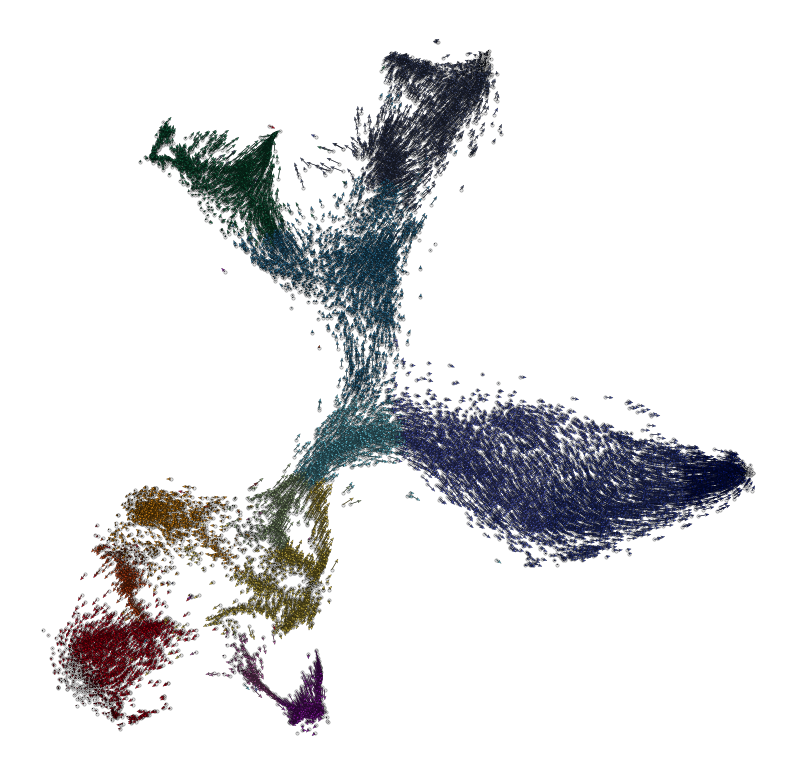

In [27]:
plt.figure(None,(14,14))
quiver_scale = 60

plt.scatter(vlm.embedding[:, 0], vlm.embedding[:, 1],
            c="0.8", alpha=0.2, s=10, edgecolor=['none'])

ix_choice = np.random.choice(vlm.embedding.shape[0], size=int(vlm.embedding.shape[0]/1.), replace=False)
plt.scatter(vlm.embedding[ix_choice, 0], vlm.embedding[ix_choice, 1],
            c="0.8", alpha=0.4, s=10, edgecolor=(0,0,0,1), lw=0.3, rasterized=True)

quiver_kwargs=dict(headaxislength=7, headlength=11, headwidth=8,linewidths=0.25, width=0.00045,edgecolors="k", color=vlm.colorandum[ix_choice], alpha=1)
plt.quiver(vlm.embedding[ix_choice, 0], vlm.embedding[ix_choice, 1],
           vlm.delta_embedding[ix_choice, 0], vlm.delta_embedding[ix_choice, 1],
           scale=quiver_scale, **quiver_kwargs)

plt.axis("off")

2022-06-30 11:01:55,323 - WARNING - The arrow scale was set to be 'absolute' make sure you know how to properly interpret the plots


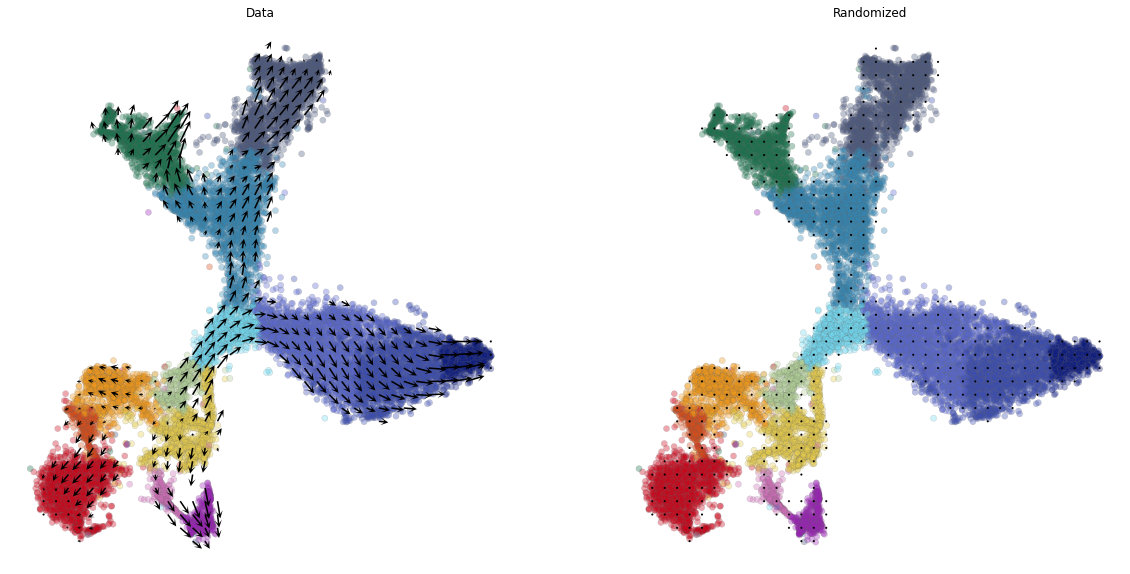

In [28]:
# initial divide by mean
plt.figure(None,(20,10))
vlm.plot_grid_arrows(quiver_scale=0.48,
                     scatter_kwargs_dict={"alpha":0.35, "lw":0.35, "edgecolor":"0.4", "s":38, "rasterized":True}, min_mass=24, angles='xy', scale_units='xy',
                     headaxislength=2.75, headlength=5, headwidth=4.8, minlength=1.5,
                     plot_random=True, scale_type="absolute")

## Produce non default plots

In [29]:
def gaussian_kernel(X, mu = 0, sigma=1):
    return np.exp(-(X - mu)**2 / (2*sigma**2)) / np.sqrt(2*np.pi*sigma**2)

In [30]:
from scipy.stats import norm
from sklearn.neighbors import NearestNeighbors

(-5.5, 7.5)

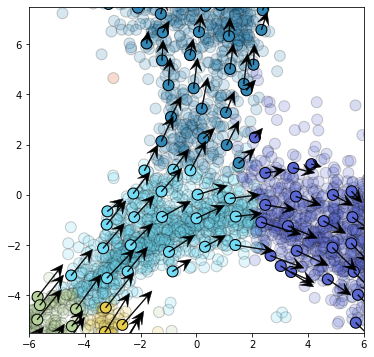

In [31]:
plt.figure(None,(6,6))

steps = 45, 45
grs = []
for dim_i in range(vlm.embedding.shape[1]):
    m, M = np.min(vlm.embedding[:, dim_i]), np.max(vlm.embedding[:, dim_i])
    m = m - 0.025 * np.abs(M - m)
    M = M + 0.025 * np.abs(M - m)
    gr = np.linspace(m, M, steps[dim_i])
    grs.append(gr)

meshes_tuple = np.meshgrid(*grs)
gridpoints_coordinates = np.vstack([i.flat for i in meshes_tuple]).T
gridpoints_coordinates = gridpoints_coordinates + norm.rvs(loc=0, scale=0.15, size=gridpoints_coordinates.shape)

nn = NearestNeighbors()
nn.fit(vlm.embedding)
dist, ixs = nn.kneighbors(gridpoints_coordinates, 20)
ix_choice = ixs[:,0].flat[:]
ix_choice = np.unique(ix_choice)

nn = NearestNeighbors()
nn.fit(vlm.embedding)
dist, ixs = nn.kneighbors(vlm.embedding[ix_choice], 20)
density_extimate = gaussian_kernel(dist, mu=0, sigma=0.5).sum(1)
bool_density = density_extimate > np.percentile(density_extimate, 25)
ix_choice = ix_choice[bool_density]

plt.scatter(vlm.embedding[:, 0], vlm.embedding[:, 1],
            c=vlm.colorandum, alpha=0.2, s=120, edgecolor=['none'])
plt.scatter(vlm.embedding[ix_choice, 0], vlm.embedding[ix_choice, 1],
            c=vlm.colorandum[ix_choice], alpha=1, s=120, edgecolor="k")

quiver_kwargs=dict(scale=6.8, headaxislength=9, headlength=15, headwidth=14,linewidths=0.4, edgecolors="k", color="k", alpha=1)
plt.quiver(vlm.embedding[ix_choice, 0], vlm.embedding[ix_choice, 1],
           vlm.delta_embedding[ix_choice, 0], vlm.delta_embedding[ix_choice, 1],
           **quiver_kwargs)

plt.xlim(-6.,6) 
plt.ylim(-5.5,7.5)

(-20.5, -14.0)

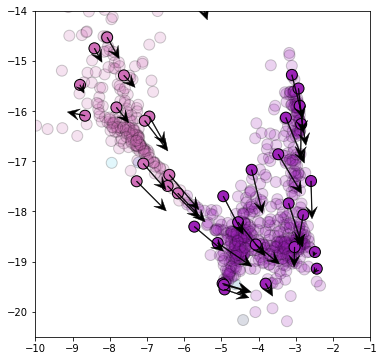

In [32]:
plt.figure(None,(6,6))

steps = 55, 55
grs = []
for dim_i in range(vlm.embedding.shape[1]):
    m, M = np.min(vlm.embedding[:, dim_i]), np.max(vlm.embedding[:, dim_i])
    m = m - 0.025 * np.abs(M - m)
    M = M + 0.025 * np.abs(M - m)
    gr = np.linspace(m, M, steps[dim_i])
    grs.append(gr)

meshes_tuple = np.meshgrid(*grs)
gridpoints_coordinates = np.vstack([i.flat for i in meshes_tuple]).T
gridpoints_coordinates = gridpoints_coordinates + norm.rvs(loc=0, scale=0.15, size=gridpoints_coordinates.shape)

from sklearn.neighbors import NearestNeighbors
nn = NearestNeighbors()
nn.fit(vlm.embedding)
dist, ixs = nn.kneighbors(gridpoints_coordinates, 20)
ix_choice = ixs[:,0].flat[:]
ix_choice = np.unique(ix_choice)

nn = NearestNeighbors()
nn.fit(vlm.embedding)
dist, ixs = nn.kneighbors(vlm.embedding[ix_choice], 20)
density_extimate = gaussian_kernel(dist, mu=0, sigma=0.5).sum(1)
bool_density = density_extimate > np.percentile(density_extimate, 30)
ix_choice = ix_choice[bool_density]

plt.scatter(vlm.embedding[:, 0], vlm.embedding[:, 1],
            c=vlm.colorandum, alpha=0.2, s=120, edgecolor=['none'])

plt.scatter(vlm.embedding[ix_choice, 0], vlm.embedding[ix_choice, 1],
            c=vlm.colorandum[ix_choice], alpha=1, s=120, edgecolor="k")

quiver_kwargs=dict(scale=6.8, headaxislength=9, headlength=15, headwidth=14,linewidths=0.4, edgecolors="k", color="k", alpha=1)
#quiver_kwargs=dict(headaxislength=8, headlength=10, headwidth=1,linewidths=0.1, edgecolors="k", color=self.colorandum[ix_choice])


plt.quiver(vlm.embedding[ix_choice, 0], vlm.embedding[ix_choice, 1],
           vlm.delta_embedding[ix_choice, 0], vlm.delta_embedding[ix_choice, 1],
           **quiver_kwargs)

plt.xlim(-10,-1)
plt.ylim(-20.5,-14)

In [33]:
vlm.estimate_transition_prob(hidim="Sx_sz", embed="ts", transform="sqrt", psc=1,
                             n_neighbors=4000, knn_random=True, sampled_fraction=0.98, calculate_randomized=False)

2022-06-30 11:01:56,786 - DEBUG - Calculate KNN in the embedding space


/gpfs/ysm/project/sumry2022/sumry2022_gt392/conda_envs/test/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3398: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  exec(code_obj, self.user_global_ns, self.user_ns)


2022-06-30 11:02:34,352 - DEBUG - Correlation Calculation 'knn_random'
2022-06-30 11:08:30,695 - DEBUG - Done Correlation Calculation


In [34]:
vlm.calculate_embedding_shift(sigma_corr = 0.05, expression_scaling=False)

2022-06-30 11:08:30,709 - DEBUG - Calculate transition probability
2022-06-30 11:08:34,053 - DEBUG - Calculate transition probability for negative control


In [35]:
transition_probs = np.copy(vlm.transition_prob)

9187
12258
2022-06-30 11:09:28,556 - DEBUG - locator: <matplotlib.ticker.AutoLocator object at 0x2b0087d595b0>


/tmp/ipykernel_260210/543726914.py:46: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  plt.colorbar(ax)


(0.0, 1.0, 0.0, 1.0)

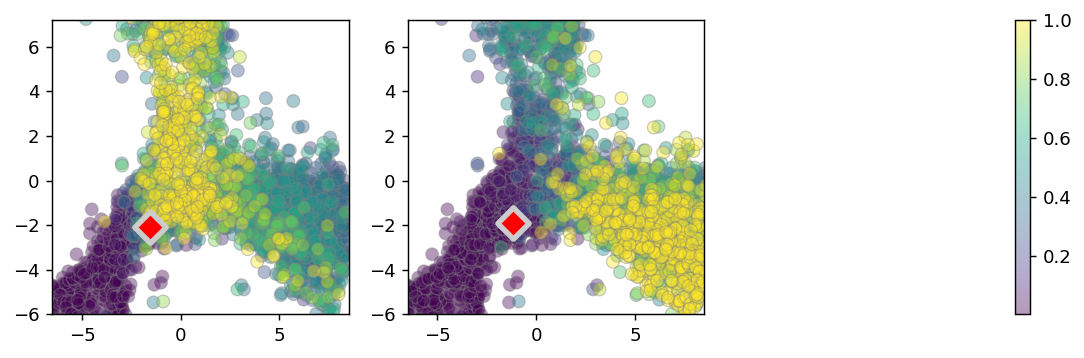

In [36]:
plt.figure(None,(10,3), dpi=130)
plt.subplot(131)
ix1 = 9187
print(ix1)
ix = ix1
neigh_bool = (vlm.embedding_knn[ix,:].A[0] > 0)
colorandum = vlm.transition_prob[ix,:][neigh_bool]
#print(np.percentile(colorandum, 10))
#print(np.percentile(colorandum, 90))
colorandum -= 1e-6 
colorandum = colorandum / 7e-4
colorandum = np.clip(colorandum, 0, 1)
plt.scatter(vlm.embedding[neigh_bool,:][:, 0][np.argsort(colorandum)],
            vlm.embedding[neigh_bool,:][:, 1][np.argsort(colorandum)],
            c=colorandum[np.argsort(colorandum)], 
            cmap=plt.cm.viridis, alpha=0.4, lw=0.7, s=50, edgecolor="0.5", rasterized=True)
plt.scatter(vlm.embedding[ix, 0], vlm.embedding[ix, 1],
            c="r", alpha=1, s=150, lw=3, edgecolor="0.8", marker="D")
plt.xlim(-6.5,8.5) 
plt.ylim(-6,7.2)

plt.subplot(132)
ix2 = 12258 
print(ix2)
ix = ix2

neigh_bool = (vlm.embedding_knn[ix,:].A[0] > 0)
colorandum = vlm.transition_prob[ix,:][neigh_bool]
#print(np.percentile(colorandum, 10))
#print(np.percentile(colorandum, 90))
colorandum -= 1e-6
colorandum = colorandum / 7e-4
colorandum = np.clip(colorandum, 0, 1)

ax = plt.scatter(vlm.embedding[neigh_bool,:][:, 0][np.argsort(colorandum)],
                 vlm.embedding[neigh_bool,:][:, 1][np.argsort(colorandum)],
                 c=colorandum[np.argsort(colorandum)], 
                 cmap=plt.cm.viridis, alpha=0.4, lw=0.7, s=50, edgecolor="0.5", rasterized=True)

plt.scatter(vlm.embedding[ix, 0], vlm.embedding[ix, 1],
            c="r", alpha=1, s=150, lw=3, edgecolor="0.8", marker="D")
plt.xlim(-6.5,8.5) 
plt.ylim(-6,7.2)

plt.subplot(133)
plt.colorbar(ax)
plt.axis("off")

0.00010242739424707952
0.0005216465269334617
2.2381405452016296e-05
0.0008267452214103129
2022-06-30 11:10:57,228 - DEBUG - locator: <matplotlib.ticker.AutoLocator object at 0x2b008ac96730>


/tmp/ipykernel_260210/2217806239.py:44: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  plt.colorbar(ax)


(0.0, 1.0, 0.0, 1.0)

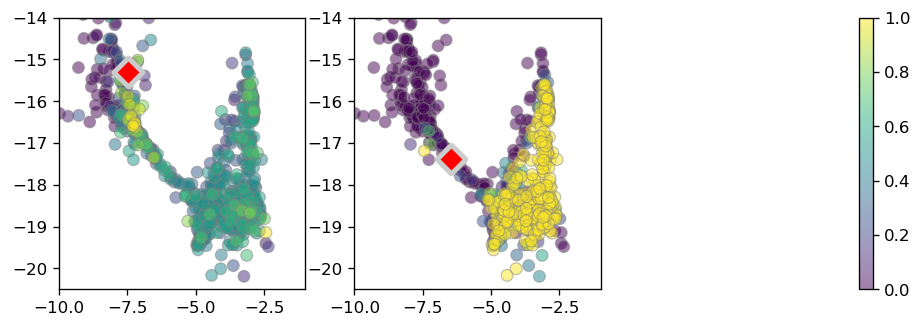

In [37]:
plt.figure(None,(9,3), dpi=120)
plt.subplot(131)
ix1 = 15608 # 4563


ix = ix1
neigh_bool = (vlm.embedding_knn[ix,:].A[0] > 0)
colorandum = vlm.transition_prob[ix,:][neigh_bool]
print(np.percentile(colorandum, 10))
print(np.percentile(colorandum, 90))
colorandum -= 2e-4 
colorandum = colorandum / 7e-4
colorandum = np.clip(colorandum, 0, 1)
plt.scatter(vlm.embedding[neigh_bool,:][:, 0][np.argsort(colorandum)],
            vlm.embedding[neigh_bool,:][:, 1][np.argsort(colorandum)],
            c=colorandum[np.argsort(colorandum)], 
            cmap=plt.cm.viridis, alpha=0.5, lw=0.7, s=50, edgecolor="0.5", rasterized=True)
plt.scatter(vlm.embedding[ix, 0], vlm.embedding[ix, 1],
            c="r", alpha=1, s=150, lw=3, edgecolor="0.8", marker="D")
plt.xlim(-10,-1)
plt.ylim(-20.5,-14)

plt.subplot(132)
ix2 = 10977
ix = ix2

neigh_bool = (vlm.embedding_knn[ix,:].A[0] > 0)
colorandum = vlm.transition_prob[ix,:][neigh_bool]
print(np.percentile(colorandum, 10))
print(np.percentile(colorandum, 90))
colorandum -= 2e-4
colorandum = colorandum / 7e-4
colorandum = np.clip(colorandum, 0, 1)
ax = plt.scatter(vlm.embedding[neigh_bool,:][:, 0][np.argsort(colorandum)],
                 vlm.embedding[neigh_bool,:][:, 1][np.argsort(colorandum)],
                 c=colorandum[np.argsort(colorandum)], 
                 cmap=plt.cm.viridis, alpha=0.5, lw=0.7, s=50, edgecolor="0.5", rasterized=True)
#plt.colorbar()
plt.scatter(vlm.embedding[ix, 0], vlm.embedding[ix, 1],
            c="r", alpha=1, s=150, lw=3, edgecolor="0.8", marker="D")
plt.xlim(-10,-1)
plt.ylim(-20.5,-14)
plt.subplot(133)
plt.colorbar(ax)
plt.axis("off")

## Markov Chain

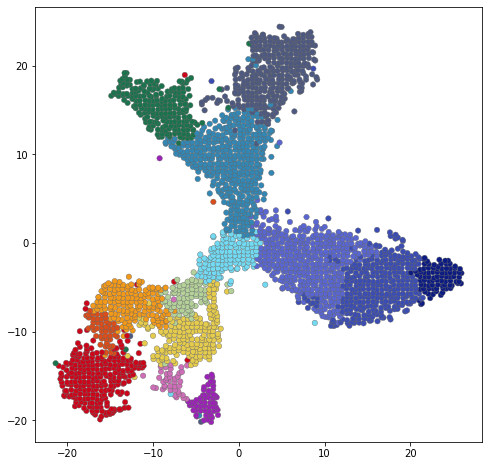

In [38]:
# Sample uniformly the points to avoid density driven effects - Should reimplement as a method
steps = 100, 100
grs = []
for dim_i in range(vlm.embedding.shape[1]):
    m, M = np.min(vlm.embedding[:, dim_i]), np.max(vlm.embedding[:, dim_i])
    m = m - 0.025 * np.abs(M - m)
    M = M + 0.025 * np.abs(M - m)
    gr = np.linspace(m, M, steps[dim_i])
    grs.append(gr)

meshes_tuple = np.meshgrid(*grs)
gridpoints_coordinates = np.vstack([i.flat for i in meshes_tuple]).T

from sklearn.neighbors import NearestNeighbors
nn = NearestNeighbors()
nn.fit(vlm.embedding)
dist, ixs = nn.kneighbors(gridpoints_coordinates, 1)

diag_step_dist = np.sqrt((meshes_tuple[0][0,0] - meshes_tuple[0][0,1])**2 + (meshes_tuple[1][0,0] - meshes_tuple[1][1,0])**2)
min_dist = diag_step_dist / 2
ixs = ixs[dist < min_dist]
gridpoints_coordinates = gridpoints_coordinates[dist.flat[:]<min_dist,:]
dist = dist[dist < min_dist]

ixs = np.unique(ixs)

plt.figure(None,(8,8))
vcy.scatter_viz(vlm.embedding[ixs, 0], vlm.embedding[ixs, 1],
                c=vlm.colorandum[ixs], alpha=1, s=30, lw=0.4,
                edgecolor="0.4")

In [39]:
vlm.prepare_markov(sigma_D=diag_step_dist, sigma_W=diag_step_dist/2., direction='forward', cells_ixs=ixs)

In [40]:
vlm.run_markov(starting_p=np.ones(len(ixs)), n_steps=2500)

(-23.731478326232093,
 28.314256715054594,
 -22.419359159351956,
 26.642612406386053)

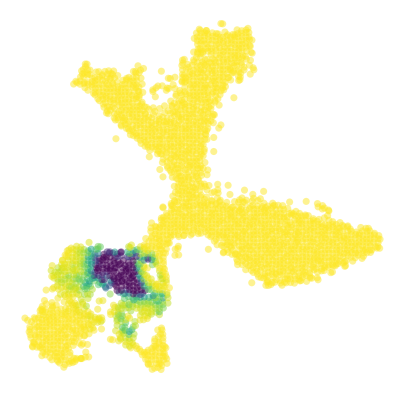

In [43]:
diffused_n = vlm.diffused - np.percentile(vlm.diffused, 3)
diffused_n /= np.percentile(diffused_n, 97)
diffused_n = np.clip(diffused_n, 0, 1)

plt.figure(None,(7,7))
vcy.scatter_viz(vlm.embedding[ixs, 0], vlm.embedding[ixs, 1],
                c=diffused_n, alpha=0.5, s=50, lw=0.,
                edgecolor=['none'], cmap="viridis_r", rasterized=True)
plt.axis("off")

In [42]:
vlm.prepare_markov(sigma_D=diag_step_dist, sigma_W=diag_step_dist/2., direction='backwards', cells_ixs=ixs)
vlm.run_markov(starting_p=np.ones(len(ixs)), n_steps=2500)

(-23.731478326232093,
 28.314256715054594,
 -22.419359159351956,
 26.642612406386053)

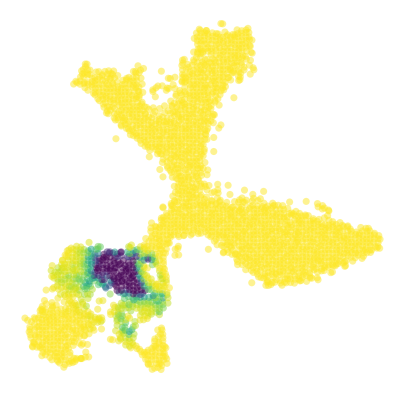

In [45]:
diffused_n = vlm.diffused - np.percentile(vlm.diffused, 3)
diffused_n /= np.percentile(diffused_n, 97)
diffused_n = np.clip(diffused_n, 0, 1)

plt.figure(None,(7,7))
vcy.scatter_viz(vlm.embedding[ixs, 0], vlm.embedding[ixs, 1],
                c=diffused_n, alpha=0.5, s=50, lw=0.,
                edgecolor=['none'], cmap="viridis_r", rasterized=True)
plt.axis("off")